# A notebook for analyzing the various sites data.
**The data, for security measures, is stored in Azure Storage Account in the cloud. It is then consumed through Azure ML workspace.**

In [1]:
from azureml.core import Workspace, Datastore, Dataset
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import matplotlib.dates as mdates

**Execute Azure setup and gather data from the workspace datastores**

In [2]:
ws = Workspace.from_config("./config/config")
az_store = Datastore.get(ws, 'azureml_ds_b01')
az_dataset = Dataset.get_by_name(ws, "Petrosani_01")
az_dataset_Turda = Dataset.get_by_name(ws, "Turda_01")
az_default_store = ws.get_default_datastore()
df = az_dataset.to_pandas_dataframe()
df_Turda_ = az_dataset_Turda.to_pandas_dataframe()

**Winter and summer periods for Petrosani dataset. Min, max & mean**

In [3]:
start_date_win = '2020-12-01'
end_date_win = '2021-02-28'
# Select DataFrame rows between two dates
mask_win = (df['Date_Id'] > start_date_win) & (df['Date_Id'] <= end_date_win)
df_winter = df.loc[mask_win]

start_date_sum = '2021-06-01'
end_date_sum = '2021-08-31'
# Select DataFrame rows between two dates
mask_sum = (df['Date_Id'] > start_date_sum) & (df['Date_Id'] <= end_date_sum)
df_summer = df.loc[mask_sum]


# classic statistical insight
df_sum = df_summer[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']].agg(['min','max','mean'])
df_win = df_winter[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']].agg(['min','max','mean'])
print(df_sum)
print(df_win)


      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed
min                4.000000   6.100000   13.600000  22.200000   0.000000
max               84.000000  43.000000   30.900000  32.900000  90.000000
mean              13.287139  20.931169   20.320974  26.259694  46.184339
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed
min                6.000000 -12.600000    6.600000  18.900000  15.000000
max               71.400000  21.900000   26.300000  27.700000  80.000000
mean               7.429469   2.167165   15.654349  25.143264  61.344833


In [4]:
df1 = df[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']].agg(['min','max','mean'])
print(df1)

      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed
min                4.000000 -19.800000    6.200000  18.000000   0.000000
max               84.000000  43.000000   30.900000  32.900000  90.000000
mean               8.647105   9.744159   16.844175  25.595678  56.088068


In [5]:
sum_row = len(df_summer.index)
win_row = len(df_winter.index)
print(sum_row)
print(win_row)

63969
41681


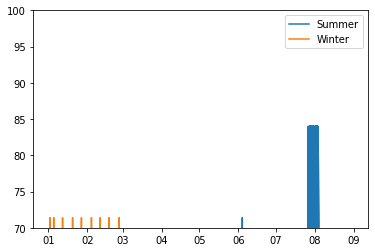

In [6]:

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))

# plot summer dataset
plt.plot(df_summer["Date_Id"], df_summer["ControllerStateNumber"], label = "Summer")
plt.ylim([70,100])

# plot winter dataset
plt.plot(df_winter["Date_Id"], df_winter["ControllerStateNumber"], label = "Winter")
plt.ylim([70,100])




plt.legend()
plt.show()

      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed
min                4.000000  14.200000    16.60000  23.400000   0.000000
max               84.000000  42.200000    30.90000  32.900000  90.000000
mean              22.474017  24.348457    23.56526  28.290759  46.697973


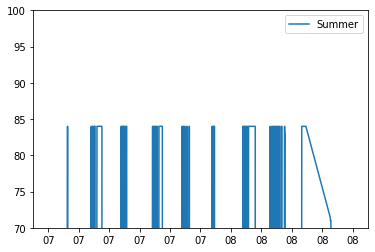

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
stdate = '2021-07-26'
endate = '2021-08-5'
# Select DataFrame rows between two dates
mask_yaz = (df['Date_Id'] > stdate) & (df['Date_Id'] <= endate)
df_inspect = df.loc[mask_yaz]
# classic statistical insight
df_res = df_inspect[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']].agg(['min','max','mean'])

print(df_res)


plt.plot(df_inspect["Date_Id"], df_inspect["ControllerStateNumber"], label = "Summer")
plt.ylim([70,100])
plt.legend()
plt.show()


(70.0, 90.0)

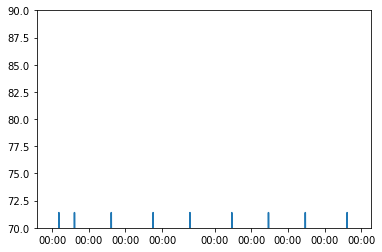

In [8]:

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M:%H'))

plt.plot(df_winter["Date_Id"], df_winter["ControllerStateNumber"])
plt.ylim([70,90])

In [9]:

import matplotlib.dates as mdates
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))


mask_sum22 = (df_summer['ControllerStateNumber'] > 70) & (df['ControllerStateNumber'] <= 90)
df_summer22 = df.loc[mask_sum22]
win_row22 = len(df_summer22.index)
print(win_row22)

802


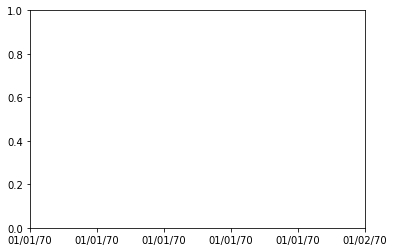

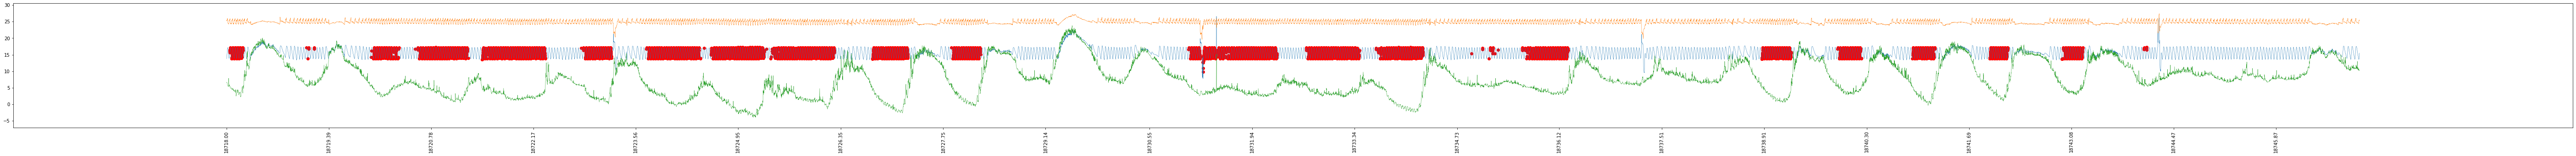

In [11]:

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
#ax = plt.gca()
formats = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
stdate = '2021-04-01'
endate = '2021-04-30'
# Select DataFrame rows between two dates
mask_yaz = (df['Date_Id'] > stdate) & (df['Date_Id'] <= endate)
df_inspect = df.loc[mask_yaz]

# classic statistical insight
df_res = df_inspect[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']].agg(['min','max','mean'])

#print(df_res)

x = df_inspect["Date_Id"]
y = df_inspect["Temp_Floor"]
y3 = df_inspect["Temp_Room"]
y4 = df_inspect["Temp_Out"]
points = df_inspect[df_inspect['Temp_Room'] > (20 + df_inspect['Temp_Out'])]

x2 = points['Date_Id']
y2 = points['Temp_Floor']

plt.figure(figsize=(100,5))
plt.margins(0.1)
plt.xticks(x[::1000], rotation='vertical')
plt.plot(x, y, label = "Floor",linewidth=0.5)
plt.plot(x, y3, label = "Room",linewidth=0.5)
plt.plot(x, y4, label = "Out",linewidth=0.5)
plt.scatter(x2, y2, c='r')
#print(points)
#plt.ylim([-50,50])
#plt.legend()

#plt.savefig("test.svg")


# To analyze the Petrosani and Turda sites, 4 periods of statistic measurements have been taken.
**The periods are also plottet into seperate graphs for comparing**


 March
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed  \
min                6.000000  -7.200000    7.900000  19.100000  15.000000   
max               71.400000  18.800000   25.500000  27.500000  80.000000   
mean               7.448194   3.979105   15.555013  24.895533  58.876532   

      CoolingSource_Id  
min           0.000000  
max           1.000000  
mean          0.004411  
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed  \
min                     6.0  -0.300000    7.500000  21.900000  26.000000   
max                     6.0  18.600000   19.800000  26.100000  62.000000   
mean                    6.0   9.196392   12.128904  23.019534  35.852821   

      CoolingSource_Id  
min                0.0  
max                0.0  
mean               0.0  

 April
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room  FanSpeed  \
min                6.000000  -3.900000     7.80000  19.600000   0.00000   
max               71.400

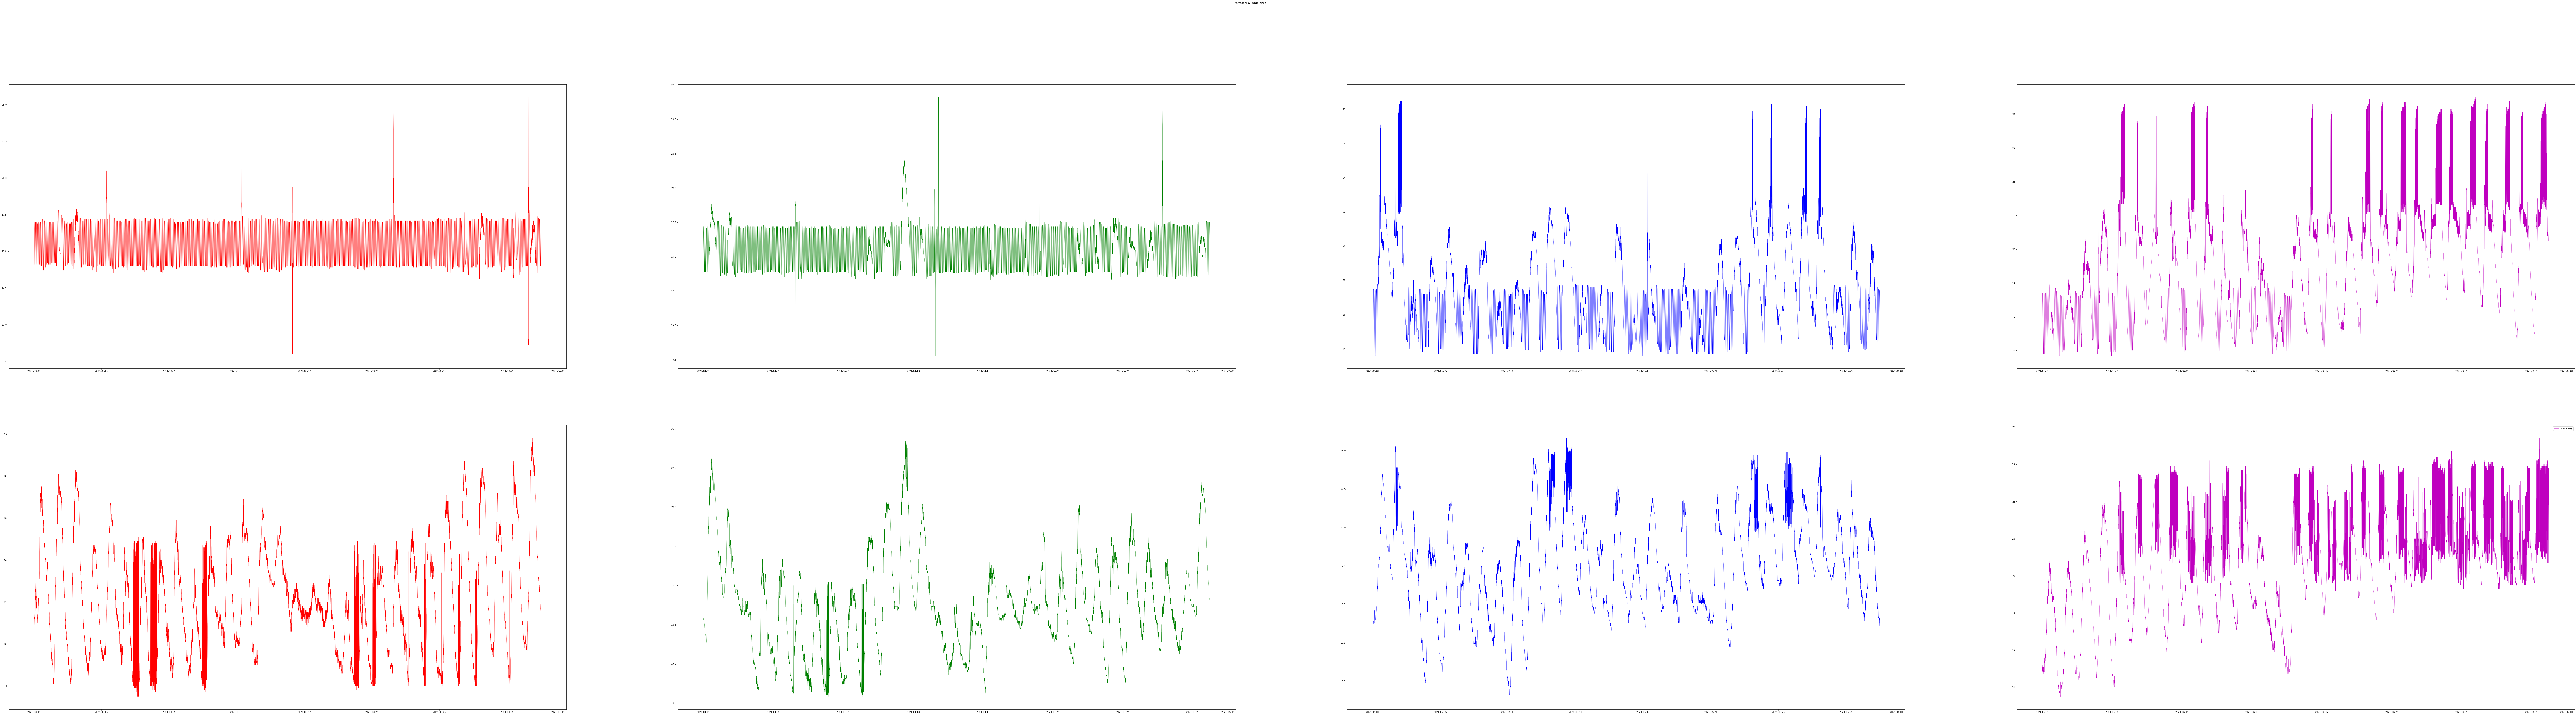

In [12]:
# format x axis label
#ax = plt.gca()
#formats = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))

# march
stdate_march = '2021-03-01'
endate_march = '2021-03-31'
# april
stdate_april = '2021-04-01'
endate_april = '2021-04-30'
# may
stdate_may = '2021-05-01'
endate_may = '2021-05-31'
# june
stdate_june = '2021-06-01'
endate_june = '2021-06-30'



# Select DataFrame rows between two dates
mask_Petrosani_march = (df['Date_Id'] > stdate_march) & (df['Date_Id'] <= endate_march)
df_Petrosani_March = df.loc[mask_Petrosani_march]
#
mask_Petrosani_april = (df['Date_Id'] > stdate_april) & (df['Date_Id'] <= endate_april)
df_Petrosani_April = df.loc[mask_Petrosani_april]
#
mask_Petrosani_may = (df['Date_Id'] > stdate_may) & (df['Date_Id'] <= endate_may)
df_Petrosani_May = df.loc[mask_Petrosani_may]
#
mask_Petrosani_june = (df['Date_Id'] > stdate_june) & (df['Date_Id'] <= endate_june)
df_Petrosani_June = df.loc[mask_Petrosani_june]

# ---

mask_Turda_march = (df_Turda_['Date_Id'] > stdate_march) & (df_Turda_['Date_Id'] <= endate_march)
df_Turda_March = df_Turda_.loc[mask_Turda_march]
#
mask_Turda_April = (df_Turda_['Date_Id'] > stdate_april) & (df_Turda_['Date_Id'] <= endate_april)
df_Turda_April = df_Turda_.loc[mask_Turda_April]
#
mask_Turda_May = (df_Turda_['Date_Id'] > stdate_may) & (df_Turda_['Date_Id'] <= endate_may)
df_Turda_May = df_Turda_.loc[mask_Turda_May]
#
mask_Turda_june = (df_Turda_['Date_Id'] > stdate_june) & (df_Turda_['Date_Id'] <= endate_june)
df_Turda_June = df_Turda_.loc[mask_Turda_june]


# ---

y_petro_march = df_Petrosani_March["Temp_Floor"]
y_petro_april = df_Petrosani_April["Temp_Floor"]
y_petro_may = df_Petrosani_May["Temp_Floor"]
y_petro_june = df_Petrosani_June["Temp_Floor"]
#
y_turda_march = df_Turda_March["Temp_Floor"]
y_turda_april = df_Turda_April["Temp_Floor"]
y_turda_may = df_Turda_May["Temp_Floor"]
y_turda_june = df_Turda_June["Temp_Floor"]
#
x_petro_march = df_Petrosani_March["Date_Id"]
x_petro_april = df_Petrosani_April["Date_Id"]
x_petro_may = df_Petrosani_May["Date_Id"]
x_petro_June = df_Petrosani_June["Date_Id"]
#
x_turda_march = df_Turda_March["Date_Id"]
x_turda_april = df_Turda_April["Date_Id"]
x_turda_may = df_Turda_May["Date_Id"]
x_turda_june = df_Turda_June["Date_Id"]


#points = df_inspect[df_inspect['Temp_Room'] > (20 + df_inspect['Temp_Out'])]

# ---
fig, axs = plt.subplots(2,4, figsize=(200,50))
fig.suptitle('Petrosani & Turda sites')
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']

axs[0, 0].plot(x_petro_march, y_petro_march,linewidth=0.5, label="Petro-March", c='r')
axs[0, 1].plot(x_petro_april, y_petro_april,linewidth=0.5, label="Petro-April", c='g')
axs[0, 2].plot(x_petro_may, y_petro_may,linewidth=0.5, label="Petro-May", c='b')
axs[0, 3].plot(x_petro_June, y_petro_june,linewidth=0.5, label="Petro-May", c='m')
#
axs[1, 0].plot(x_turda_march, y_turda_march,linewidth=0.5, label="Turda-March", c='r')
axs[1, 1].plot(x_turda_april, y_turda_april,linewidth=0.5, label="Turda-April", c='g')
axs[1, 2].plot(x_turda_may, y_turda_may,linewidth=0.5, label="Turda-May", c='b')
axs[1, 3].plot(x_turda_june, y_turda_june,linewidth=0.5, label="Turda-May", c='m')

plt.legend()


# ---


df_Petrosani_3 = df_Petrosani_March[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_3 = df_Turda_March[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
#
df_Petrosani_4 = df_Petrosani_April[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_4 = df_Turda_April[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
#
df_Petrosani_5 = df_Petrosani_May[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_5 = df_Turda_May[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
#
df_Petrosani_6 = df_Petrosani_June[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_6 = df_Turda_June[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])

print("\n March")
print(df_Petrosani_3)
print(df_Turda_3)

print("\n April")
print(df_Petrosani_4)
print(df_Turda_4)

print("\n May")
print(df_Petrosani_5)
print(df_Turda_5)

print("\n June")
print(df_Petrosani_6)
print(df_Turda_6)







 March
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed  \
min                6.000000  -7.200000    7.900000  19.100000  15.000000   
max               71.400000  18.800000   25.500000  27.500000  80.000000   
mean               7.448194   3.979105   15.555013  24.895533  58.876532   

      CoolingSource_Id  
min           0.000000  
max           1.000000  
mean          0.004411  
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed  \
min                     6.0  -0.300000    7.500000  21.900000  26.000000   
max                     6.0  18.600000   19.800000  26.100000  62.000000   
mean                    6.0   9.196392   12.128904  23.019534  35.852821   

      CoolingSource_Id  
min                0.0  
max                0.0  
mean               0.0  

 April
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room  FanSpeed  \
min                6.000000  -3.900000     7.80000  19.600000   0.00000   
max               71.400

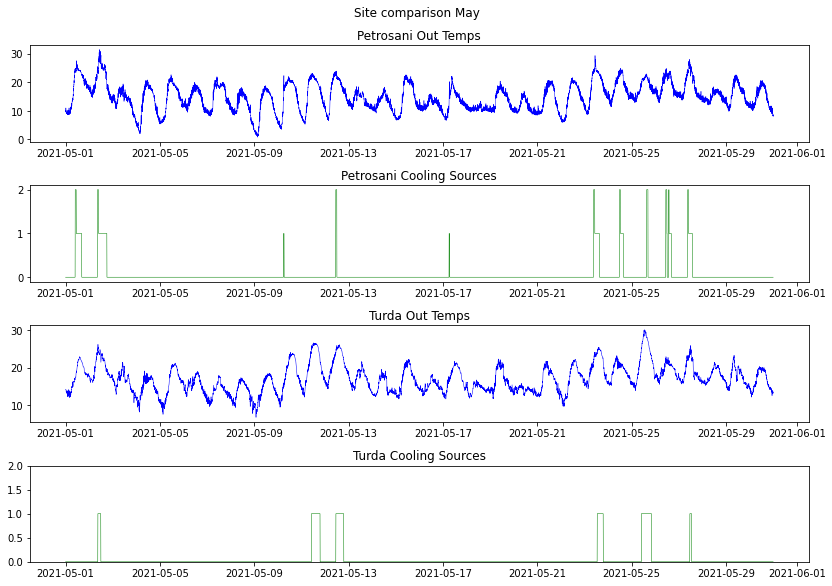

In [13]:

# font size change
plt.rcParams.update({'font.size': 10})

# format x axis label
#ax = plt.gca()
#formats = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))

# march
stdate_march = '2021-03-01'
endate_march = '2021-03-31'
# april
stdate_april = '2021-04-01'
endate_april = '2021-04-30'
# may
stdate_may = '2021-05-01'
endate_may = '2021-05-31'
# june
stdate_june = '2021-06-01'
endate_june = '2021-06-30'



# Select DataFrame rows between two dates
mask_Petrosani_march = (df['Date_Id'] > stdate_march) & (df['Date_Id'] <= endate_march)
df_Petrosani_March = df.loc[mask_Petrosani_march]
#
mask_Petrosani_april = (df['Date_Id'] > stdate_april) & (df['Date_Id'] <= endate_april)
df_Petrosani_April = df.loc[mask_Petrosani_april]
#
mask_Petrosani_may = (df['Date_Id'] > stdate_may) & (df['Date_Id'] <= endate_may)
df_Petrosani_May = df.loc[mask_Petrosani_may]
#
mask_Petrosani_june = (df['Date_Id'] > stdate_june) & (df['Date_Id'] <= endate_june)
df_Petrosani_June = df.loc[mask_Petrosani_june]

# ---

mask_Turda_march = (df_Turda_['Date_Id'] > stdate_march) & (df_Turda_['Date_Id'] <= endate_march)
df_Turda_March = df_Turda_.loc[mask_Turda_march]
#
mask_Turda_April = (df_Turda_['Date_Id'] > stdate_april) & (df_Turda_['Date_Id'] <= endate_april)
df_Turda_April = df_Turda_.loc[mask_Turda_April]
#
mask_Turda_May = (df_Turda_['Date_Id'] > stdate_may) & (df_Turda_['Date_Id'] <= endate_may)
df_Turda_May = df_Turda_.loc[mask_Turda_May]
#
mask_Turda_june = (df_Turda_['Date_Id'] > stdate_june) & (df_Turda_['Date_Id'] <= endate_june)
df_Turda_June = df_Turda_.loc[mask_Turda_june]


# ---

y_petro_march = df_Petrosani_March["Temp_Out"]
y_petro_april = df_Petrosani_April["Temp_Out"]
y_petro_may = df_Petrosani_May["Temp_Out"]
y_petro_june = df_Petrosani_June["Temp_Out"]
#
y_turda_march = df_Turda_March["Temp_Out"]
y_turda_april = df_Turda_April["Temp_Out"]
y_turda_may = df_Turda_May["Temp_Out"]
y_turda_june = df_Turda_June["Temp_Out"]
#
x_petro_march = df_Petrosani_March["Date_Id"]
x_petro_april = df_Petrosani_April["Date_Id"]
x_petro_may = df_Petrosani_May["Date_Id"]
x_petro_June = df_Petrosani_June["Date_Id"]
#
x_turda_march = df_Turda_March["Date_Id"]
x_turda_april = df_Turda_April["Date_Id"]
x_turda_may = df_Turda_May["Date_Id"]
x_turda_june = df_Turda_June["Date_Id"]


#points = df_inspect[df_inspect['Temp_Room'] > (20 + df_inspect['Temp_Out'])]

# ---
px = 1/plt.rcParams['figure.dpi']
fig, (axs1, axs2, axs3, axs4) = plt.subplots(4, figsize=(842*px, 595*px))
fig.suptitle('Site comparison May')
#fig.xticks(rotation=70)
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']


#axs[0, 0].plot(x_petro_march, y_petro_march,linewidth=0.5, label="Petro-March", c='r')
#axs[0, 1].plot(x_petro_april, y_petro_april,linewidth=0.5, label="Petro-April", c='g')

axs1.title.set_text('Petrosani Out Temps')
axs1.plot(x_petro_may, y_petro_may,linewidth=0.5, label="Petro-May Temp Out", c='b')

axs2.title.set_text('Petrosani Cooling Sources')
axs2.plot(x_petro_may, df_Petrosani_May['CoolingSource_Id'],linewidth=0.5, label="Petro-May Cooling Source", c='g')
#axs[0, 3].plot(x_petro_June, y_petro_june,linewidth=0.5, label="Petro-May", c='m')
#
#axs[1, 0].plot(x_turda_march, y_turda_march,linewidth=0.5, label="Turda-March", c='r')
#axs[1, 1].plot(x_turda_april, y_turda_april,linewidth=0.5, label="Turda-April", c='g')
axs3.title.set_text('Turda Out Temps')
axs3.plot(x_turda_may, y_turda_may,linewidth=0.5, label="Turda-May Temp Out", c='b')

axs4.title.set_text('Turda Cooling Sources')
axs4.plot(x_turda_may, df_Turda_May['CoolingSource_Id'],linewidth=0.5, label="Turda-May Cooling Source", c='g')
#axs[1, 3].plot(x_turda_june, y_turda_june,linewidth=0.5, label="Turda-May", c='m')

ax = plt.gca()
ax.set_ylim([0, 2])

# ---

df_Petrosani_3 = df_Petrosani_March[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_3 = df_Turda_March[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
#
df_Petrosani_4 = df_Petrosani_April[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_4 = df_Turda_April[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
#
df_Petrosani_5 = df_Petrosani_May[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_5 = df_Turda_May[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
#
df_Petrosani_6 = df_Petrosani_June[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])
df_Turda_6 = df_Turda_June[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 'CoolingSource_Id']].agg(['min','max','mean'])

print("\n March")
print(df_Petrosani_3)
print(df_Turda_3)

print("\n April")
print(df_Petrosani_4)
print(df_Turda_4)

print("\n May")
print(df_Petrosani_5)
print(df_Turda_5)

print("\n June")
print(df_Petrosani_6)
print(df_Turda_6)

plt.tight_layout()
plt.savefig("test123.svg")



**Hot encoded Dataframe to get statistical analysis on the sources**

C:\Users\OguzX\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.
C:\Users\OguzX\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  



 March
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed  \
min                6.000000  -7.200000    7.900000  19.100000  15.000000   
max               71.400000  18.800000   25.500000  27.500000  80.000000   
mean               7.448194   3.979105   15.555013  24.895533  58.876532   

             0         1    2  
min   0.000000  0.000000  0.0  
max   1.000000  1.000000  0.0  
mean  0.995589  0.004411  0.0  
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room   FanSpeed  \
min                     6.0  -0.300000    8.000000  21.900000  26.000000   
max                     6.0  18.600000   19.800000  26.100000  62.000000   
mean                    6.0   9.259033   12.173485  23.029519  35.935673   

             0         1         2  
min   0.000000  0.000000  0.000000  
max   1.000000  1.000000  1.000000  
mean  0.993104  0.003589  0.003306  

 April
      ControllerStateNumber   Temp_Out  Temp_Floor  Temp_Room  FanSpeed  \
min                6.00

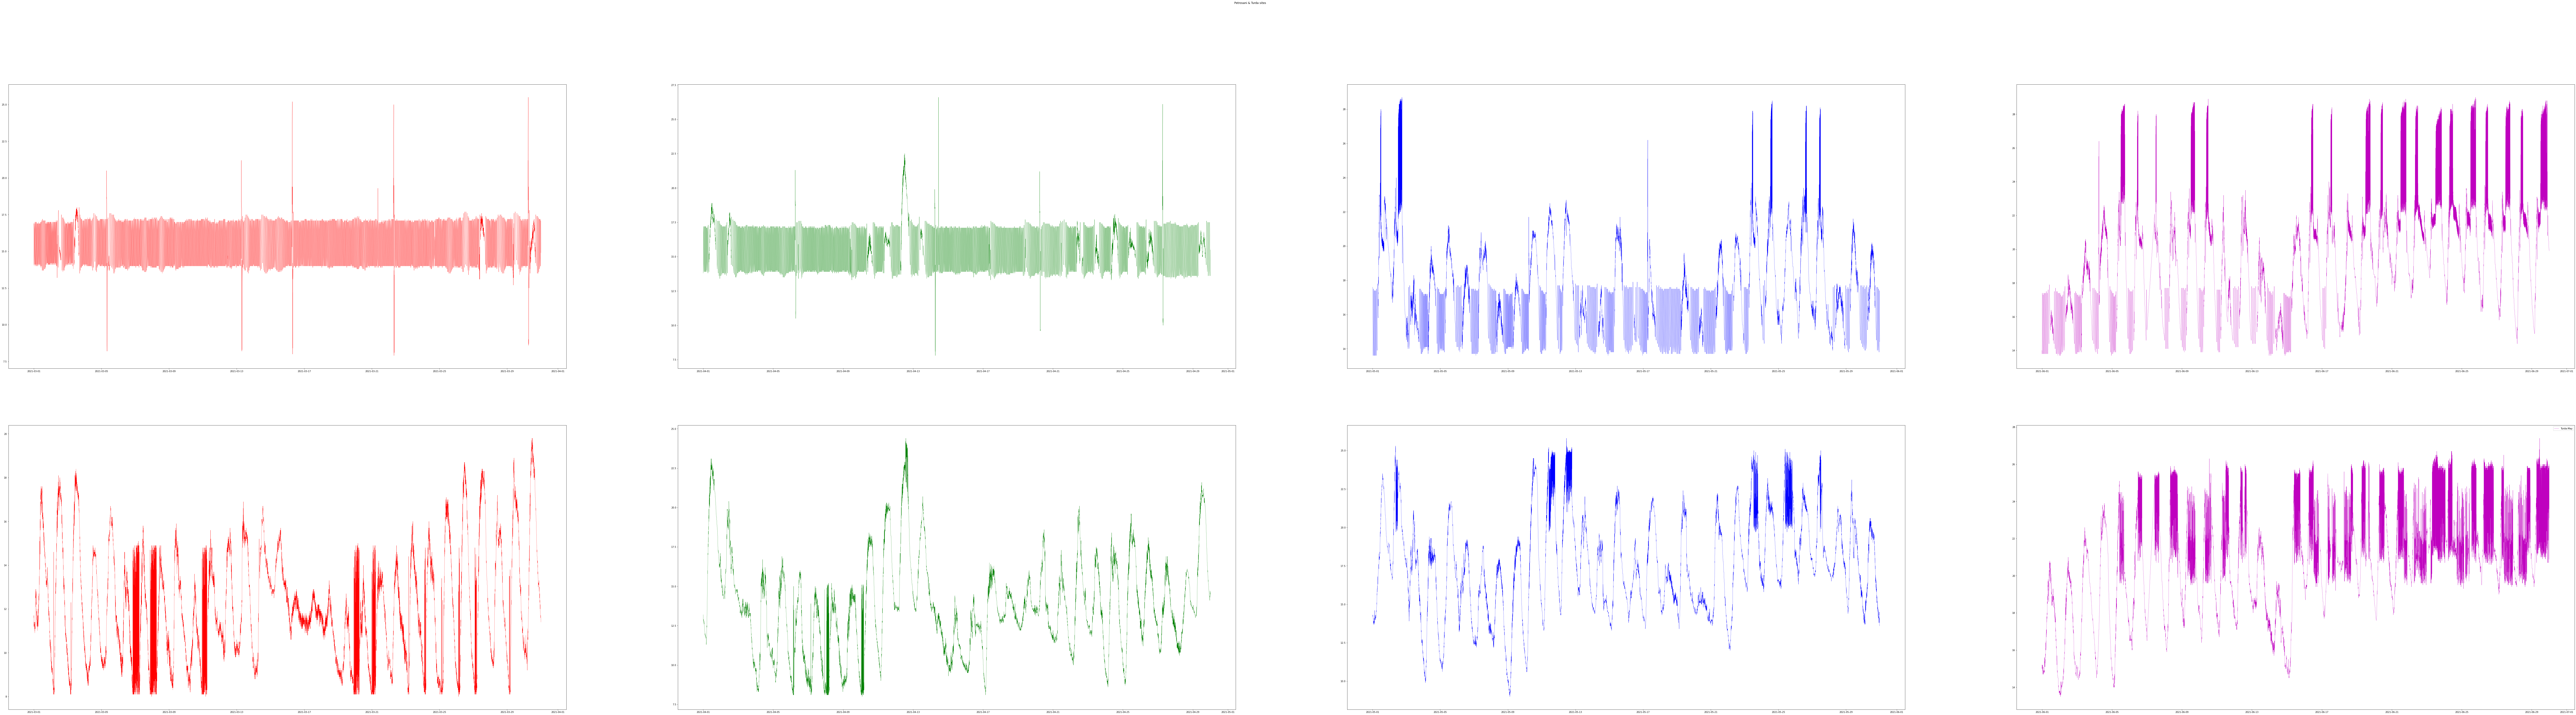

In [14]:
df_hotencoded = pd.concat([df, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()
df_hotencoded_Turda = pd.concat([df_Turda_, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()


# format x axis label
#ax = plt.gca()
#formats = plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))

# march
stdate_march = '2021-03-01'
endate_march = '2021-03-31'
# april
stdate_april = '2021-04-01'
endate_april = '2021-04-30'
# may
stdate_may = '2021-05-01'
endate_may = '2021-05-31'
# june
stdate_june = '2021-06-01'
endate_june = '2021-06-30'



# Select DataFrame rows between two dates
mask_Petrosani_march = (df_hotencoded['Date_Id'] > stdate_march) & (df_hotencoded['Date_Id'] <= endate_march)
df_Petrosani_March = df_hotencoded.loc[mask_Petrosani_march]
#
mask_Petrosani_april = (df_hotencoded['Date_Id'] > stdate_april) & (df_hotencoded['Date_Id'] <= endate_april)
df_Petrosani_April = df_hotencoded.loc[mask_Petrosani_april]
#
mask_Petrosani_may = (df_hotencoded['Date_Id'] > stdate_may) & (df_hotencoded['Date_Id'] <= endate_may)
df_Petrosani_May = df_hotencoded.loc[mask_Petrosani_may]
#
mask_Petrosani_june = (df_hotencoded['Date_Id'] > stdate_june) & (df_hotencoded['Date_Id'] <= endate_june)
df_Petrosani_June = df_hotencoded.loc[mask_Petrosani_june]

# ---

mask_Turda_march = (df_hotencoded_Turda['Date_Id'] > stdate_march) & (df_hotencoded_Turda['Date_Id'] <= endate_march)
df_Turda_March = df_hotencoded_Turda.loc[mask_Turda_march]
#
mask_Turda_April = (df_hotencoded_Turda['Date_Id'] > stdate_april) & (df_hotencoded_Turda['Date_Id'] <= endate_april)
df_Turda_April = df_hotencoded_Turda.loc[mask_Turda_April]
#
mask_Turda_May = (df_hotencoded_Turda['Date_Id'] > stdate_may) & (df_hotencoded_Turda['Date_Id'] <= endate_may)
df_Turda_May = df_hotencoded_Turda.loc[mask_Turda_May]
#
mask_Turda_june = (df_hotencoded_Turda['Date_Id'] > stdate_june) & (df_hotencoded_Turda['Date_Id'] <= endate_june)
df_Turda_June = df_hotencoded_Turda.loc[mask_Turda_june]


# ---

y_petro_march = df_Petrosani_March["Temp_Floor"]
y_petro_april = df_Petrosani_April["Temp_Floor"]
y_petro_may = df_Petrosani_May["Temp_Floor"]
y_petro_june = df_Petrosani_June["Temp_Floor"]
#
y_turda_march = df_Turda_March["Temp_Floor"]
y_turda_april = df_Turda_April["Temp_Floor"]
y_turda_may = df_Turda_May["Temp_Floor"]
y_turda_june = df_Turda_June["Temp_Floor"]
#
x_petro_march = df_Petrosani_March["Date_Id"]
x_petro_april = df_Petrosani_April["Date_Id"]
x_petro_may = df_Petrosani_May["Date_Id"]
x_petro_June = df_Petrosani_June["Date_Id"]
#
x_turda_march = df_Turda_March["Date_Id"]
x_turda_april = df_Turda_April["Date_Id"]
x_turda_may = df_Turda_May["Date_Id"]
x_turda_june = df_Turda_June["Date_Id"]


#points = df_inspect[df_inspect['Temp_Room'] > (20 + df_inspect['Temp_Out'])]

# ---
fig, axs = plt.subplots(2,4, figsize=(200,50))
fig.suptitle('Petrosani & Turda sites')
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']

axs[0, 0].plot(x_petro_march, y_petro_march,linewidth=0.5, label="Petro-March", c='r')
axs[0, 1].plot(x_petro_april, y_petro_april,linewidth=0.5, label="Petro-April", c='g')
axs[0, 2].plot(x_petro_may, y_petro_may,linewidth=0.5, label="Petro-May", c='b')
axs[0, 3].plot(x_petro_June, y_petro_june,linewidth=0.5, label="Petro-May", c='m')
#
axs[1, 0].plot(x_turda_march, y_turda_march,linewidth=0.5, label="Turda-March", c='r')
axs[1, 1].plot(x_turda_april, y_turda_april,linewidth=0.5, label="Turda-April", c='g')
axs[1, 2].plot(x_turda_may, y_turda_may,linewidth=0.5, label="Turda-May", c='b')
axs[1, 3].plot(x_turda_june, y_turda_june,linewidth=0.5, label="Turda-May", c='m')

plt.legend()


# ---


df_Petrosani_3 = df_Petrosani_March[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
df_Turda_3 = df_Turda_March[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
#
df_Petrosani_4 = df_Petrosani_April[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
df_Turda_4 = df_Turda_April[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
#
df_Petrosani_5 = df_Petrosani_May[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
df_Turda_5 = df_Turda_May[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
#
df_Petrosani_6 = df_Petrosani_June[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])
df_Turda_6 = df_Turda_June[['ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed', 0, 1, 2]].agg(['min','max','mean'])

print("\n March")
print(df_Petrosani_3)
print(df_Turda_3)

print("\n April")
print(df_Petrosani_4)
print(df_Turda_4)

print("\n May")
print(df_Petrosani_5)
print(df_Turda_5)

print("\n June")
print(df_Petrosani_6)
print(df_Turda_6)





        Temp_Id             Date_Id  Location_Id  CoolingSource_Id  Temp_Out  \
120853  3062537 2020-11-22 00:44:00         2325                 0       1.8   
120854  3062538 2020-11-22 00:46:00         2325                 0       1.7   
120857  3062541 2020-11-22 00:52:00         2325                 0       1.9   
120867  3062551 2020-11-22 01:12:00         2325                 0       2.1   
120868  3062552 2020-11-22 01:14:00         2325                 0       2.0   
...         ...                 ...          ...               ...       ...   
422312  3463921 2022-04-04 06:16:00         2325                 0       3.2   
422313  3463922 2022-04-04 06:18:00         2325                 0       3.4   
422314  3463923 2022-04-04 06:20:00         2325                 0       3.3   
422344  3463953 2022-04-04 07:20:00         2325                 0       3.7   
422955  3464564 2022-04-05 03:49:00         2325                 0       2.8   

        Temp_Floor  Temp_Room  FanSpeed

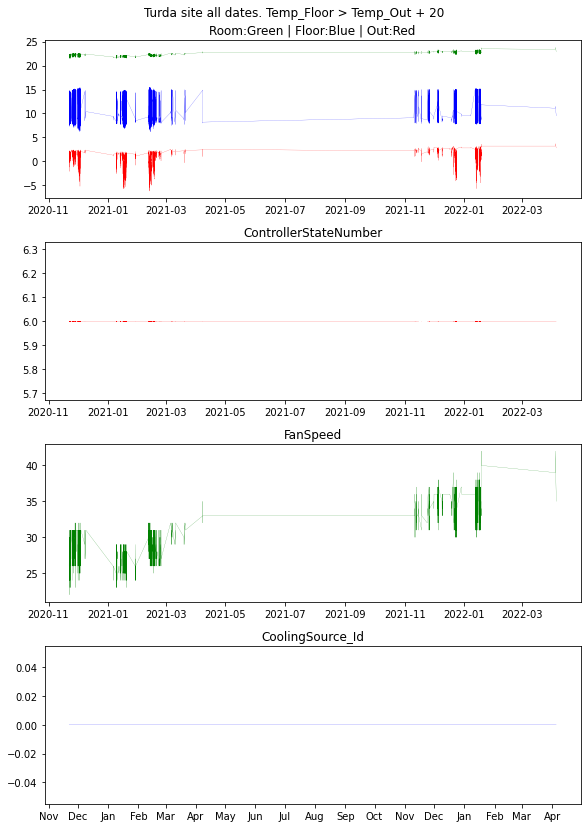

In [15]:
#df_hotencoded = pd.concat([df, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()


# march
stdate_march = '2021-03-01'
endate_march = '2021-03-31'
# april
stdate_april = '2021-04-01'
endate_april = '2021-04-30'
# may
stdate_may = '2021-05-01'
endate_may = '2021-05-31'
# june
stdate_june = '2021-06-01'
endate_june = '2021-06-30'

alldatestart = '2020-01-01'
alldateend = '2022-06-06'


mast_diff_turda_june = (df_Turda_['Date_Id'] > alldatestart) & (df_Turda_['Date_Id'] <= alldateend) & (df_Turda_['Temp_Room'] > (df_Turda_['Temp_Out'] + 20))
df_difference_turda_may = df_Turda_.loc[mast_diff_turda_june]

import matplotlib.dates as mdates
locator = mdates.MonthLocator()
dates = df_difference_turda_may['Date_Id']
fmt = mdates.DateFormatter('%b')

'''
# ---
fig, axs = plt.subplots(2,2, figsize=(50,10))
fig.suptitle('Petrosani & Turda sites')
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']

axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Room'],linewidth=0.5, label="Petro-March", c='g')
axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Floor'],linewidth=0.5, label="Petro-March", c='b')
axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Out'],linewidth=0.5, label="Petro-March", c='r')

axs[0, 1].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['ControllerStateNumber'],linewidth=0.5, label="Petro-April", c='b')
#
axs[1, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['FanSpeed'],linewidth=0.5, label="Turda-March", c='g')

axs[1, 1].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['CoolingSource_Id'],linewidth=0.5, label="Turda-April", c='r')

#print(df_difference_turda_may)
'''



# ---
px = 1/plt.rcParams['figure.dpi']
fig, (axs1, axs2, axs3, axs4) = plt.subplots(4, figsize=(595*px, 842*px))
fig.suptitle('Turda site all dates. Temp_Floor > Temp_Out + 20')
#fig.xticks(rotation=70)

xss = plt.gca().xaxis
xss.set_major_locator(locator),xss.set_major_formatter(fmt)
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']


#axs[0, 0].plot(x_petro_march, y_petro_march,linewidth=0.5, label="Petro-March", c='r')
#axs[0, 1].plot(x_petro_april, y_petro_april,linewidth=0.5, label="Petro-April", c='g')

axs1.title.set_text('Room:Green | Floor:Blue | Out:Red')
axs1.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Room'],linewidth=0.15, label="Petro-May Temp Out", c='g')
axs1.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Floor'],linewidth=0.15, label="Petro-May Temp Out", c='b')
axs1.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Out'],linewidth=0.15, label="Petro-May Temp Out", c='r')

axs2.title.set_text('ControllerStateNumber')
axs2.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['ControllerStateNumber'],linewidth=0.15, label="Petro-May Temp Out", c='r')

axs3.title.set_text('FanSpeed')
axs3.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['FanSpeed'],linewidth=0.15, label="Petro-May Temp Out", c='g')

axs4.title.set_text('CoolingSource_Id')
axs4.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['CoolingSource_Id'],linewidth=0.15, label="Petro-May Temp Out", c='b')
#axs[1, 3].plot(x_turda_june, y_turda_june,linewidth=0.5, label="Turda-May", c='m')


plt.tight_layout()
print(df_difference_turda_may)





        Temp_Id             Date_Id  Location_Id  CoolingSource_Id  Temp_Out  \
721     2917100 2020-06-05 08:52:00         2325                 1      23.6   
731     2917110 2020-06-05 09:12:00         2325                 1      24.1   
995     2917374 2020-06-05 18:04:00         2325                 1      23.8   
998     2917377 2020-06-05 18:10:00         2325                 1      23.6   
1001    2917380 2020-06-05 18:16:00         2325                 1      23.5   
...         ...                 ...          ...               ...       ...   
455458  3503932 2022-05-20 17:52:00         2325                 1      23.0   
455459  3503933 2022-05-20 17:54:00         2325                 1      23.0   
455460  3503934 2022-05-20 17:56:00         2325                 1      23.0   
455461  3503935 2022-05-20 17:58:00         2325                 1      22.9   
455912  3504386 2022-05-21 09:06:00         2325                 1      24.4   

        Temp_Floor  Temp_Room  FanSpeed

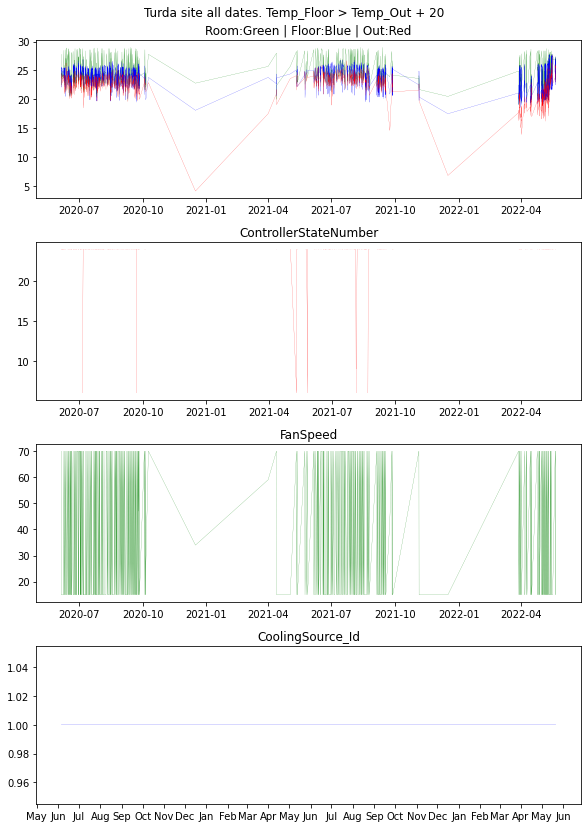

In [54]:
#df_hotencoded = pd.concat([df, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()


# march
stdate_march = '2021-03-01'
endate_march = '2021-03-31'
# april
stdate_april = '2021-04-01'
endate_april = '2021-04-30'
# may
stdate_may = '2021-05-01'
endate_may = '2021-05-31'
# june
stdate_june = '2021-06-01'
endate_june = '2021-06-30'

alldatestart = '2020-01-01'
alldateend = '2022-06-06'


mast_diff_petro_all = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend) & (df['Temp_Room'] > (df['Temp_Out'])) & (df['CoolingSource_Id'] >= 1)
df_difference_petro = df.loc[mast_diff_petro_all]


mast_diff_turda_all = (df_Turda_['Date_Id'] > alldatestart) & (df_Turda_['Date_Id'] <= alldateend) & (df_Turda_['Temp_Room'] > (df_Turda_['Temp_Out'])) & (df_Turda_['CoolingSource_Id'] >= 1)
df_difference_turda_may = df_Turda_.loc[mast_diff_turda_all]

import matplotlib.dates as mdates
locator = mdates.MonthLocator()
dates = df_difference_turda_may['Date_Id']
fmt = mdates.DateFormatter('%b')

'''
# ---
fig, axs = plt.subplots(2,2, figsize=(50,10))
fig.suptitle('Petrosani & Turda sites')
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']

axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Room'],linewidth=0.5, label="Petro-March", c='g')
axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Floor'],linewidth=0.5, label="Petro-March", c='b')
axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Out'],linewidth=0.5, label="Petro-March", c='r')

axs[0, 1].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['ControllerStateNumber'],linewidth=0.5, label="Petro-April", c='b')
#
axs[1, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['FanSpeed'],linewidth=0.5, label="Turda-March", c='g')

axs[1, 1].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['CoolingSource_Id'],linewidth=0.5, label="Turda-April", c='r')

#print(df_difference_turda_may)
'''



# ---
px = 1/plt.rcParams['figure.dpi']
fig, (axs1, axs2, axs3, axs4) = plt.subplots(4, figsize=(595*px, 842*px))
fig.suptitle('Turda site all dates. Temp_Floor > Temp_Out + 20')
#fig.xticks(rotation=70)

xss = plt.gca().xaxis
xss.set_major_locator(locator),xss.set_major_formatter(fmt)
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']


#axs[0, 0].plot(x_petro_march, y_petro_march,linewidth=0.5, label="Petro-March", c='r')
#axs[0, 1].plot(x_petro_april, y_petro_april,linewidth=0.5, label="Petro-April", c='g')

axs1.title.set_text('Room:Green | Floor:Blue | Out:Red')
axs1.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Room'],linewidth=0.15, label="Petro-May Temp Out", c='g')
axs1.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Floor'],linewidth=0.15, label="Petro-May Temp Out", c='b')
axs1.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Out'],linewidth=0.15, label="Petro-May Temp Out", c='r')

axs2.title.set_text('ControllerStateNumber')
axs2.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['ControllerStateNumber'],linewidth=0.15, label="Petro-May Temp Out", c='r')

axs3.title.set_text('FanSpeed')
axs3.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['FanSpeed'],linewidth=0.15, label="Petro-May Temp Out", c='g')

axs4.title.set_text('CoolingSource_Id')
axs4.plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['CoolingSource_Id'],linewidth=0.15, label="Petro-May Temp Out", c='b')
#axs[1, 3].plot(x_turda_june, y_turda_june,linewidth=0.5, label="Turda-May", c='m')


plt.tight_layout()
print(df_difference_turda_may)





        Temp_Id             Date_Id  Location_Id  CoolingSource_Id  Temp_Out  \
0        196603 2020-12-31 23:00:00         2069                 0       5.6   
1        196604 2020-12-31 23:02:00         2069                 0       5.6   
2        196605 2020-12-31 23:04:00         2069                 0       5.6   
3        196606 2020-12-31 23:06:00         2069                 0       5.8   
4        196607 2020-12-31 23:08:00         2069                 0       5.5   
...         ...                 ...          ...               ...       ...   
332597  2752988 2022-05-17 03:57:00         2069                 0      11.0   
332598  2752989 2022-05-17 03:59:00         2069                 0      10.8   
332599  2752990 2022-05-17 04:01:00         2069                 0      10.3   
332600  2752991 2022-05-17 04:03:00         2069                 0      10.7   
332602  2752993 2022-05-17 04:07:00         2069                 0      10.6   

        Temp_Floor  Temp_Room  FanSpeed

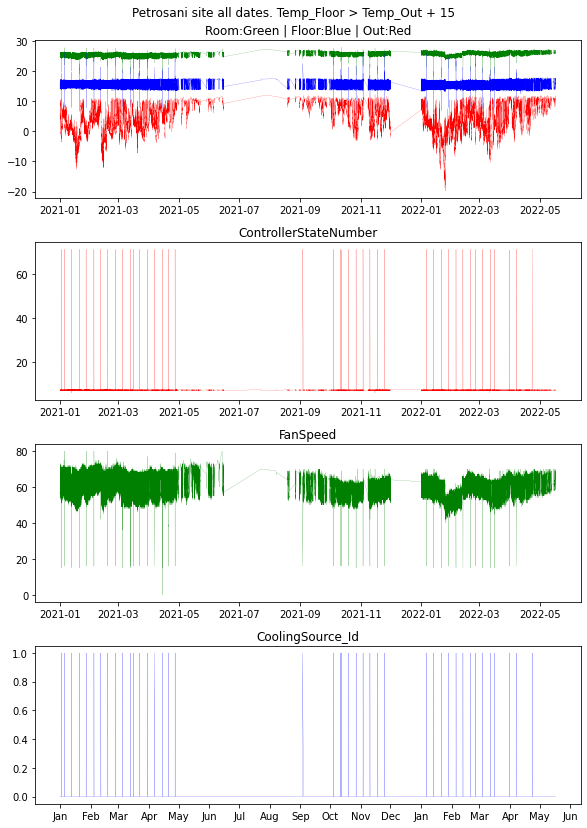

In [16]:
#df_hotencoded = pd.concat([df, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()


# march
stdate_march = '2021-03-01'
endate_march = '2021-03-31'
# april
stdate_april = '2021-04-01'
endate_april = '2021-04-30'
# may
stdate_may = '2021-05-01'
endate_may = '2021-05-31'
# june
stdate_june = '2021-06-01'
endate_june = '2021-06-30'

alldatestart = '2020-01-01'
alldateend = '2022-06-06'


mast_diff_petro_all = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend) & (df['Temp_Room'] > (df['Temp_Out'] + 15))
df_difference_petro = df.loc[mast_diff_petro_all]


mast_diff_turda_all = (df_Turda_['Date_Id'] > alldatestart) & (df_Turda_['Date_Id'] <= alldateend) & (df_Turda_['Temp_Room'] > (df_Turda_['Temp_Out'])) & (df_Turda_['CoolingSource_Id'] >= 1)
df_difference_turda_may = df_Turda_.loc[mast_diff_turda_all]

import matplotlib.dates as mdates
locator = mdates.MonthLocator()
dates = df_difference_turda_may['Date_Id']
fmt = mdates.DateFormatter('%b')

'''
# ---
fig, axs = plt.subplots(2,2, figsize=(50,10))
fig.suptitle('Petrosani & Turda sites')
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']

axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Room'],linewidth=0.5, label="Petro-March", c='g')
axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Floor'],linewidth=0.5, label="Petro-March", c='b')
axs[0, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['Temp_Out'],linewidth=0.5, label="Petro-March", c='r')

axs[0, 1].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['ControllerStateNumber'],linewidth=0.5, label="Petro-April", c='b')
#
axs[1, 0].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['FanSpeed'],linewidth=0.5, label="Turda-March", c='g')

axs[1, 1].plot(df_difference_turda_may['Date_Id'], df_difference_turda_may['CoolingSource_Id'],linewidth=0.5, label="Turda-April", c='r')

#print(df_difference_turda_may)
'''



# ---
px = 1/plt.rcParams['figure.dpi']
fig, (axs1, axs2, axs3, axs4) = plt.subplots(4, figsize=(595*px, 842*px))
fig.suptitle('Petrosani site all dates. Temp_Floor > Temp_Out + 15')
#fig.xticks(rotation=70)

xss = plt.gca().xaxis
xss.set_major_locator(locator),xss.set_major_formatter(fmt)
#

march_lab = ['March', 'April']
april_lab = ['April', 'May']
may_lab = ['May', 'June']


#axs[0, 0].plot(x_petro_march, y_petro_march,linewidth=0.5, label="Petro-March", c='r')
#axs[0, 1].plot(x_petro_april, y_petro_april,linewidth=0.5, label="Petro-April", c='g')

axs1.title.set_text('Room:Green | Floor:Blue | Out:Red')
axs1.plot(df_difference_petro['Date_Id'], df_difference_petro['Temp_Room'],linewidth=0.15, label="Petro-May Temp Out", c='g')
axs1.plot(df_difference_petro['Date_Id'], df_difference_petro['Temp_Floor'],linewidth=0.15, label="Petro-May Temp Out", c='b')
axs1.plot(df_difference_petro['Date_Id'], df_difference_petro['Temp_Out'],linewidth=0.15, label="Petro-May Temp Out", c='r')

axs2.title.set_text('ControllerStateNumber')
axs2.plot(df_difference_petro['Date_Id'], df_difference_petro['ControllerStateNumber'],linewidth=0.15, label="Petro-May Temp Out", c='r')

axs3.title.set_text('FanSpeed')
axs3.plot(df_difference_petro['Date_Id'], df_difference_petro['FanSpeed'],linewidth=0.15, label="Petro-May Temp Out", c='g')

axs4.title.set_text('CoolingSource_Id')
axs4.plot(df_difference_petro['Date_Id'], df_difference_petro['CoolingSource_Id'],linewidth=0.15, label="Petro-May Temp Out", c='b')
#axs[1, 3].plot(x_turda_june, y_turda_june,linewidth=0.5, label="Turda-May", c='m')


plt.tight_layout()
print(df_difference_petro)


plt.savefig("full_view_above15.svg")




# K-Means algorithm tests

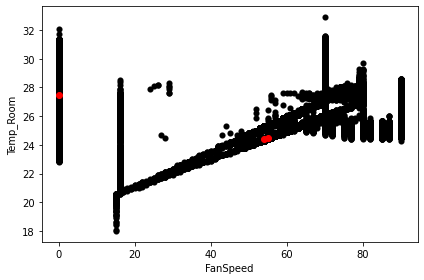

In [17]:

# simple dates filter
alldatestart = '2020-01-01'
alldateend = '2022-06-06'

# dataset
mast_diff_petro_all = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend)
df_difference_petro = df.loc[mast_diff_petro_all]

# number of centroids
K=3
Centroids = (df_difference_petro.sample(n=K))

# scatter 
plt.scatter(df_difference_petro["FanSpeed"], df_difference_petro["Temp_Room"], c="black", linewidths=0.1)
plt.scatter(Centroids["FanSpeed"],Centroids["Temp_Room"],c='red')
# label stuff
plt.xlabel('FanSpeed')
plt.ylabel('Temp_Room')

# eye candy
plt.tight_layout()

In [18]:
import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=df_difference_petro
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["FanSpeed"]-row_d["FanSpeed"])**2
            d2=(row_c["Temp_Room"]-row_d["Temp_Room"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df_difference_petro[i]=ED
        i=i+1

    C=[]
    for index,row in df_difference_petro.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df_difference_petro["Cluster"]=C
    Centroids_new = df_difference_petro.groupby(["Cluster"]).mean()[["Temp_Room","FanSpeed"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Temp_Room'] - Centroids['Temp_Room']).sum() + (Centroids_new['FanSpeed'] - Centroids['FanSpeed']).sum()
        print(diff.sum())
    Centroids = df_difference_petro.groupby(["Cluster"]).mean()[["Temp_Room","FanSpeed"]]

4.212141088310247
3.4358421766689364
1.8375518837613178
0.8880718005844256
1.5430570666058578
0.6590065628700792
1.009218497246927
0.0


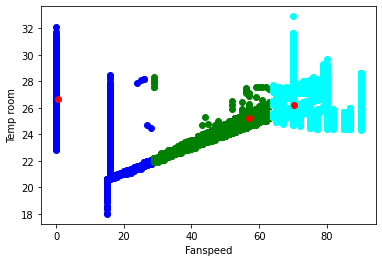

In [19]:
color=['blue','green','cyan']
for k in range(K):
    data=df_difference_petro[df_difference_petro["Cluster"]==k+1]
    plt.scatter(data["FanSpeed"],data["Temp_Room"],c=color[k])
plt.scatter(Centroids["FanSpeed"],Centroids["Temp_Room"],c='red')
plt.xlabel('Fanspeed')
plt.ylabel('Temp room')
plt.show()

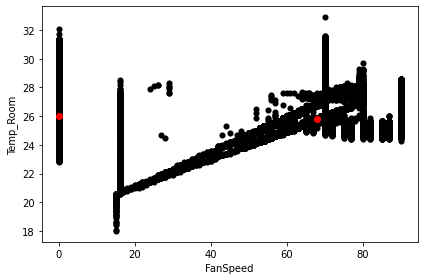

In [20]:

# simple dates filter
alldatestart = '2020-01-01'
alldateend = '2022-06-06'

# dataset
mast_diff_petro_all = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend)
df_difference_petro = df.loc[mast_diff_petro_all]

# number of centroids
K=2
Centroids = (df_difference_petro.sample(n=K))

# scatter 
plt.scatter(df_difference_petro["FanSpeed"], df_difference_petro["Temp_Room"], c="black", linewidths=0.1)
plt.scatter(Centroids["FanSpeed"],Centroids["Temp_Room"],c='red')
# label stuff
plt.xlabel('FanSpeed')
plt.ylabel('Temp_Room')

# eye candy
plt.tight_layout()

In [22]:
import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=df_difference_petro
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["FanSpeed"]-row_d["FanSpeed"])**2
            d2=(row_c["Temp_Room"]-row_d["Temp_Room"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df_difference_petro[i]=ED
        i=i+1

    C=[]
    for index,row in df_difference_petro.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df_difference_petro["Cluster"]=C
    Centroids_new = df_difference_petro.groupby(["Cluster"]).mean()[["Temp_Room","FanSpeed"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Temp_Room'] - Centroids['Temp_Room']).sum() + (Centroids_new['FanSpeed'] - Centroids['FanSpeed']).sum()
        print(diff.sum())
    Centroids = df_difference_petro.groupby(["Cluster"]).mean()[["Temp_Room","FanSpeed"]]

-0.03636017210225295
0.0


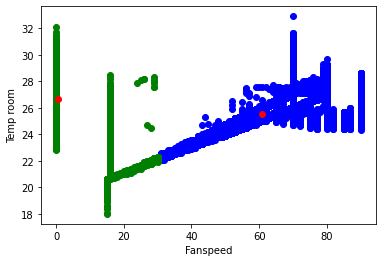

In [24]:
color=['blue','green']
for k in range(K):
    data=df_difference_petro[df_difference_petro["Cluster"]==k+1]
    plt.scatter(data["FanSpeed"],data["Temp_Room"],c=color[k])
plt.scatter(Centroids["FanSpeed"],Centroids["Temp_Room"],c='red')
plt.xlabel('Fanspeed')
plt.ylabel('Temp room')
plt.show()

# This section is for testing purposes



**Concatinating hot encoded fields**

In [ ]:
# Merge hot encoded cooling sources to df

#print(df_set)
df_hotencoded = pd.concat([df, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()


#print(df_hotencoded_Turda[[0,1,2]])
#df_hotencoded.to_csv("hotencoded_test.csv", sep='\t', encoding='utf-8')

ax = df_hotencoded.plot.bar()

ticks = [tick.get_text() for tick in ax.get_xticklabels()]
ticks = pd.to_datetime(ticks).strftime('%b %Y')
ax.set_xticklabels(ticks)

In [ ]:
duration_df['Hours Since Previous'] = (duration_df['Random Date'] -
                                       duration_df['Random Date'].shift(1)).astype('timedelta64[h]')

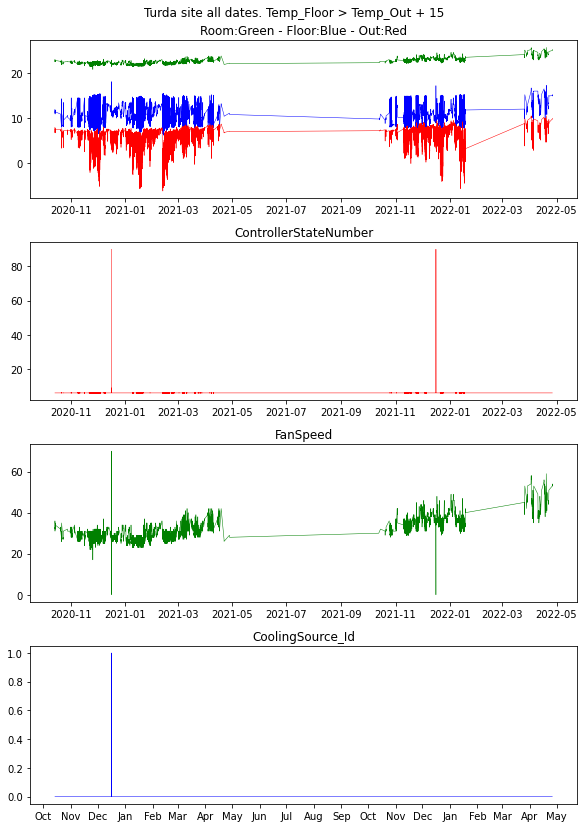

In [ ]:
# Merge hot encoded cooling sources to df

#print(df_set)
df_hotencoded = pd.concat([df, pd.get_dummies(df.CoolingSource_Id)], 1).groupby(['Date_Id', 'ControllerStateNumber','Temp_Out', 'Temp_Floor', 'Temp_Room', 'FanSpeed']).sum().reset_index()


#print(df_hotencoded_Turda[[0,1,2]])
#df_hotencoded.to_csv("hotencoded_test.csv", sep='\t', encoding='utf-8')


df_hotencoded['CoolingSource_Id'].value_counts().plot(kind='bar')

#ticks = [tick.get_text() for tick in ax.get_xticklabels()]
#ticks = pd.to_datetime(ticks).strftime('%b %Y')
#ax.set_xticklabels(ticks)

**Dataframe dateranges testing**

In [ ]:
start_date_winter = '2020-11-01'
end_date_winter = '2021-03-01'
start_date_summer = '2021-03-30'
end_date_summer = '2021-08-01'

start_date = '2021-04-01'
end_date = '2021-08-01'
# Select DataFrame rows between two dates
mask = (df['Date_Id'] > start_date) & (df['Date_Id'] <= end_date)
df_summer = df.loc[mask]

df_avg = df_summer[['ControllerStateNumber']].mean()
print(df_summer)
print(df_avg)


**Plotting tests**

In [ ]:
df_Turda_June['CoolingSource_Id'].value_counts().plot(kind='bar')


In [9]:
df.loc[df['Temp_Room'] > df['Temp_Out'], 'Temp_Diff'] = 1
df.loc[df['Temp_Room'] < df['Temp_Out'], 'Temp_Diff'] = 0
df.loc[df['Temp_Room'] > (df['Temp_Out'] + 10), 'High_Diff'] = 1

df.head()
print(df)

        Temp_Id             Date_Id  Location_Id  CoolingSource_Id  Temp_Out  \
0        196603 2020-12-31 23:00:00         2069                 0       5.6   
1        196604 2020-12-31 23:02:00         2069                 0       5.6   
2        196605 2020-12-31 23:04:00         2069                 0       5.6   
3        196606 2020-12-31 23:06:00         2069                 0       5.8   
4        196607 2020-12-31 23:08:00         2069                 0       5.5   
...         ...                 ...          ...               ...       ...   
333624  2754015 2022-05-18 14:20:00         2069                 0      17.7   
333625  2754016 2022-05-18 14:22:00         2069                 0      17.8   
333626  2754017 2022-05-18 14:24:00         2069                 0      17.9   
333627  2754018 2022-05-18 14:26:00         2069                 0      18.9   
333628  2754019 2022-05-18 14:28:00         2069                 0      17.7   

        Temp_Floor  Temp_Room  FanSpeed

In [ ]:
from azureml.core import Workspace, Datastore, Dataset
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import json
import logging

from matplotlib import pyplot as plt
import pandas as pd
import os

import azureml.core
from azureml.core.experiment import Experiment

ws = Workspace.from_config("./config/config_2")
az_store = Datastore.get(ws, 'blobcontainer_01')
az_dataset = Dataset.get_by_name(ws, "Petrosani_01")
#az_dataset_Turda = Dataset.get_by_name(ws, "Turda_01")
az_default_store = ws.get_default_datastore()
df = az_dataset.to_pandas_dataframe()
#df_Turda_ = az_dataset_Turda.to_pandas_dataframe()

# simple dates filter
alldatestart = '2021-01-01'
alldateend = '2021-12-31'

# dataset
mast_diff_petro_all = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend)
df_difference_petro = df.loc[mast_diff_petro_all]

# number of centroids
K=3
Centroids = (df_difference_petro.sample(n=K))

# scatter 
plt.scatter(df_difference_petro["Temp_Out"], df_difference_petro["FanSpeed"], c="black", linewidths=0.1)
plt.scatter(Centroids["Temp_Out"],Centroids["FanSpeed"],c='red')
# label stuff
plt.xlabel('Temp_Out')
plt.ylabel('FanSpeed')

# eye candy
plt.tight_layout()
plt.show()

import numpy as np
diff = 1
j=0

while(diff!=0):
    XD=df_difference_petro
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Temp_Out"]-row_d["Temp_Out"])**2
            d2=(row_c["FanSpeed"]-row_d["FanSpeed"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df_difference_petro[i]=ED
        i=i+1

    C=[]
    for index,row in df_difference_petro.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df_difference_petro["Cluster"]=C
    Centroids_new = df_difference_petro.groupby(["Cluster"]).mean()[["FanSpeed","Temp_Out"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['FanSpeed'] - Centroids['FanSpeed']).sum() + (Centroids_new['Temp_Out'] - Centroids['Temp_Out']).sum()
        print(diff.sum())
    Centroids = df_difference_petro.groupby(["Cluster"]).mean()[["FanSpeed","Temp_Out"]]

    color=['blue','green', 'black']
for k in range(K):
    data=df_difference_petro[df_difference_petro["Cluster"]==k+1]
    plt.scatter(data["Temp_Out"],data["FanSpeed"],c=color[k])
plt.scatter(Centroids["Temp_Out"],Centroids["FanSpeed"],c='red')
plt.xlabel('Temp_Out')
plt.ylabel('Fanspeed')
plt.show()

df.loc[df['Temp_Room'] > df['Temp_Out'], 'Temp_Diff'] = 1
df.loc[df['Temp_Room'] < df['Temp_Out'], 'Temp_Diff'] = 0
df.loc[df['Temp_Room'] > (df['Temp_Out'] + 15), 'Temp_Diff'] = 2

df.loc[(df['Temp_Diff'] == 2 & (df['FanSpeed'] >= 51)), 'HighFanSpeed'] = 1
df.loc[(df['Temp_Diff'] == 2 & (df['FanSpeed'] <= 50)), 'HighFanSpeed'] = 0

sum = (df['HighFanSpeed']) > 0
val = df['HighFanSpeed'] > 0


from pathlib import Path  
filepath = Path('datatest/test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)  

alldatestart = '2021-11-01'
alldateend = '2021-11-30'
mask = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend)
df_filtered = df.loc[mask]

#df.loc[df['Temp_Room'] < df['Temp_Out'], 'Temp_Diff'] = 0
df_filtered.loc[((df_filtered['Temp_Room'] > df_filtered['Temp_Out']) & (df_filtered['FanSpeed'] > df_filtered['FanSpeed'].mean())), 'FanSpeedDiffFromMean'] = df_filtered['FanSpeed'] - df_filtered['FanSpeed'].mean()
df_filtered.loc[(df_filtered['Temp_Room'] > df_filtered['Temp_Out']), 'TempDiff'] = df_filtered['Temp_Room'] - df_filtered['Temp_Out']

#df_fanspeed_mean = df_filtered['FanSpeed'] - df_filtered['FanSpeed'].mean()
#print(df_fanspeed_mean)
#print(df_filtered)

plt.figure(figsize=(200,50))

plt.plot(df_filtered['Date_Id'], df_filtered['TempDiff'])
plt.plot(df_filtered['Date_Id'], df_filtered['FanSpeedDiffFromMean'])
plt.show()

In [ ]:
alldatestart = '2021-01-01'
alldateend = '2021-12-31'

# create features
mask = (df['Date_Id'] > alldatestart) & (df['Date_Id'] <= alldateend)
df_anom = df.loc[mask]
temp_threshhold = 10
fanspeed_threshhold = 15



# define temperatur difference indicator
df_anom['RoomTempHigher'] = np.where(df_anom['Temp_Room'] > (df_anom['Temp_Out'] - temp_threshhold), 1, 0)
df_anom['TempDifFromMean'] = np.where((df_anom['Temp_Room'] - df_anom['Temp_Out']) > (df_anom['Temp_Room'].mean() - (df_anom['Temp_Out'].mean() + temp_threshhold)), 1, 0)

# define fanspeed difference from mean indicator
df_anom['FanSpeedHigherThanMean'] = np.where(df_anom['FanSpeed'] > (df_anom['FanSpeed'].mean() + fanspeed_threshhold), 1, 0)

# define abnormality from above features
df_anom['Abnormality'] = np.where(((df_anom['FanSpeedHigherThanMean'] == 1) & (df_anom['RoomTempHigher'] == 1)), 1, 0)


df_anom['TempDiff'] = np.where(((df_anom['Temp_Room'] > df_anom['Temp_Out'])), df_anom['Temp_Room'] - df_anom['Temp_Out'], 0)
df_anom['FanFreq'] = np.where(((df_anom['FanSpeed'] > df_anom['FanSpeed'].mean())), df_anom['FanSpeed'] - df_anom['FanSpeed'].mean(), 0)

# define arobs
conditions = [
    (df_anom['FanSpeedHigherThanMean'] == 1) & (df_anom['RoomTempHigher'] == 1),
    (df_anom['FanSpeedHigherThanMean'] == 1) & (df_anom['RoomTempHigher'] == 0),
    (df_anom['FanSpeedHigherThanMean'] == 0) & (df_anom['RoomTempHigher'] == 1),
    (df_anom['FanSpeedHigherThanMean'] == 0) & (df_anom['RoomTempHigher'] == 0)
    ]
values = [1, 0, 0, 0]

# create a new column and use np.select to assign values to it using our lists as arguments
df_anom['Arobs'] = np.select(conditions, values)



In [24]:
select_df = df_anom.drop(['Location_Id', 'Date_Id', 'Arobs'], 1)
select_df.describe().transpose()

C:\Users\OguzX\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


count          mean            std       min  \
Temp_Id                 235784.0  1.529274e+06  602294.365995  196634.0   
CoolingSource_Id        235784.0  1.360567e-01       0.378323       0.0   
Temp_Out                235784.0  1.131506e+01       9.053788     -12.6   
Temp_Floor              235784.0  1.726185e+01       3.114469       6.6   
Temp_Room               235784.0  2.553012e+01       1.130687      18.6   
FanSpeed                235784.0  5.529529e+01      20.455000       0.0   
ControllerStateNumber   235784.0  9.081774e+00       7.389760       4.0   
RoomTempHigher          235784.0  9.955934e-01       0.066236       0.0   
TempDifFromMean         235784.0  8.948529e-01       0.306743       0.0   
FanSpeedHigherThanMean  235784.0  9.130815e-02       0.288047       0.0   
Abnormality             235784.0  9.130815e-02       0.288047       0.0   
TempDiff                235784.0  1.450329e+01       7.949290       0.0   
FanFreq                 235784.0  6.170475e+00       8.176519       0.0   

                               25%           50%           75%           max  
Temp_Id                 1216332.75  1.275278e+06  2.155461e+06  2.214407e+06  
CoolingSource_Id              0.00  0.000000e+00  0.000000e+00  2.000000e+00  
Temp_Out                      4.20  1.050000e+01  1.710000e+01  4.300000e+01  
Temp_Floor                   15.10  1.650000e+01  1.810000e+01  3.090000e+01  
Temp_Room                    24.80  2.540000e+01  2.590000e+01  3.290000e+01  
FanSpeed                     54.00  5.900000e+01  6.400000e+01  9.000000e+01  
ControllerStateNumber         7.00  7.000000e+00  7.500000e+00  8.400000e+01  
RoomTempHigher                1.00  1.000000e+00  1.000000e+00  1.000000e+00  
TempDifFromMean               1.00  1.000000e+00  1.000000e+00  1.000000e+00  
FanSpeedHigherThanMean        0.00  0.000000e+00  0.000000e+00  1.000000e+00  
Abnormality                   0.00  0.000000e+00  0.000000e+00  1.000000e+00  
TempDiff                      8.30  1.480000e+01  2.090000e+01  3.770000e+01  
FanFreq                       0.00  3.704709e+00  8.704709e+00  3.470471e+01

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates


X = StandardScaler().fit_transform(select_df)
X

array([[-0.35963146, -0.69750606, -0.91889023, ..., -0.31699065,
         0.65373435, -0.54617086],
       [-0.35963146, -0.69750606, -1.01521505, ..., -0.31699065,
         0.79211177,  0.79914785],
       [-0.35963146, -0.69750606, -1.01521505, ..., -0.31699065,
         0.75437247,  0.43224275],
       ...,
       [-0.35963146, -1.31603302, -0.53359095, ..., -0.31699065,
         1.5594775 ,  0.30994105],
       [-0.35963146, -1.29394277, -0.40515786, ..., -0.31699065,
         1.5217382 ,  0.18763935],
       [-0.35963146, -1.29394277, -0.30883303, ..., -0.31699065,
         1.54689773,  0.30994105]])

In [14]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=2)


In [15]:
centers = model.cluster_centers_
centers

array([[-0.35540556, -0.24837037, -0.28068743, -0.16871501,  0.29397351,
        -0.30494881,  0.06652879,  0.32985802, -0.00768115, -0.00768115,
         0.22262429,  0.05289355],
       [ 2.55954308,  1.78870213,  2.02144156,  1.21504383, -2.11712466,
         2.19616606, -0.47912389, -2.37555607,  0.05531773,  0.05531773,
        -1.60328519, -0.3809263 ]])

In [16]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P



In [ ]:
P = pd_centers(select_df, centers)
P

In [ ]:
select_df

In [ ]:
datas = select_df[(select_df['Temp_Id'] % 1) == 0]
datas.shape
plt.scatter(X[2], X[5], c='b')
plt.plot(centers[1], centers[0], c='r')

In [38]:
centers.shape

(2, 12)

In [98]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        X = pd.DataFrame(data[['Temp_Out', 'Temp_Room', 'FanSpeed']])
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, data['Abnormality'], test_size=0.2, random_state=42)
        
    def getData(self):
        return self

    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    
    def classify(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)
        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

In [99]:
clus = clust(sklearn_load_ds=select_df)

clus.Kmeans(output='replace').classify()

Accuracy: 0.9070975676993872


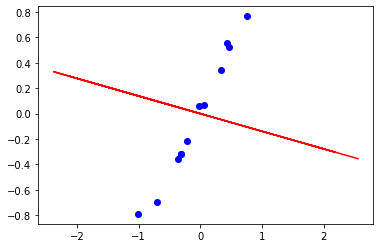

In [100]:
datas = select_df[(select_df['Temp_Id'] % 1) == 0]
datas.shape
plt.scatter(X[2], X[5], c='b')
plt.plot(centers[1], centers[0], c='r')

In [ ]:

scaler = MinMaxScaler()

data_clean = datas.dropna()
columns = data_clean.select_dtypes(include='number').columns
data_clean[columns] = scaler.fit_transform(data_clean[columns])

Xx = data_clean.drop(['Abnormality'], axis=1)
Yy = data_clean[['Abnormality']]

X_train, X_test, Y_train, Y_test = \
    train_test_split(Xx, Yy, test_size=0.3, random_state=1234, stratify=Yy)

#
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_predict = lr.predict(X_test)

Y_prop = lr.predict_proba(X_test)[:,1]

#
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predict)

score = lr.score(X_test, Y_test)

#
score